In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\19189\Desktop\original_data.csv")
df

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50
0,68523-18-2,460.00,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758
1,88-04-0,3830.00,CC1C=C(O)C=C(C)C=1Cl,3.583199
2,603-50-9,4305.00,CC(=O)OC1C=CC(=CC=1)C(C1C=CC=CN=1)C1C=CC(=CC=1...,3.633973
3,120-36-5,689.00,CC(OC1C=CC(Cl)=CC=1Cl)C(O)=O,2.838219
4,103-26-4,2610.00,COC(=O)C=CC1C=CC=CC=1,3.416641
...,...,...,...,...
11982,996-04-3,1.78,CP(=O)(SCCC)SCCC,0.250420
11983,996-05-4,18.00,CP(=S)(SCCC)SCCC,1.255273
11984,99784-08-4,7500.00,COC1C=CC(=CC=1O)C1COC2=CC=CC=C2O1,3.875061
11985,99874-01-8,5220.00,CC(C)(S)C(=O)NC(CS)C(O)=O,3.717671


In [2]:
from rdkit.Chem import PandasTools,AllChem
import numpy as np
import sklearn
import rdkit

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,Molecule
0,68523-18-2,460.00,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,
1,88-04-0,3830.00,CC1C=C(O)C=C(C)C=1Cl,3.583199,
2,603-50-9,4305.00,CC(=O)OC1C=CC(=CC=1)C(C1C=CC=CN=1)C1C=CC(=CC=1...,3.633973,
3,120-36-5,689.00,CC(OC1C=CC(Cl)=CC=1Cl)C(O)=O,2.838219,
4,103-26-4,2610.00,COC(=O)C=CC1C=CC=CC=1,3.416641,
...,...,...,...,...,...
11982,996-04-3,1.78,CP(=O)(SCCC)SCCC,0.250420,
11983,996-05-4,18.00,CP(=S)(SCCC)SCCC,1.255273,
11984,99784-08-4,7500.00,COC1C=CC(=CC=1O)C1COC2=CC=CC=C2O1,3.875061,
11985,99874-01-8,5220.00,CC(C)(S)C(=O)NC(CS)C(O)=O,3.717671,

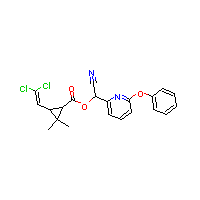
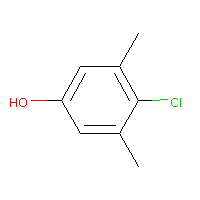
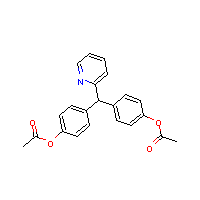
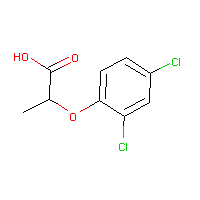
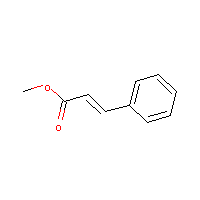
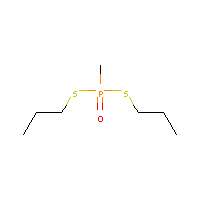
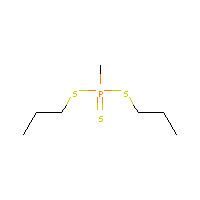
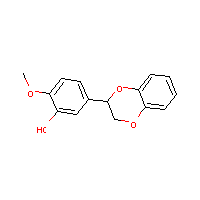
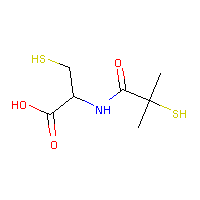
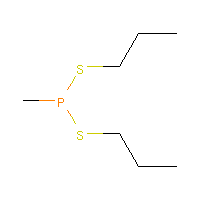

In [3]:
PandasTools.AddMoleculeColumnToFrame(df,'Canonical_QSARr','Molecule')
df

In [4]:
from rdkit import DataStructs
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=1024)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

In [5]:
df["FPs"] = df.Molecule.apply(mol2fp)
df.head(2)

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,Molecule,FPs
0,68523-18-2,460.0,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,<rdkit.Chem.rdchem.Mol object at 0x00000234DC8...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,88-04-0,3830.0,CC1C=C(O)C=C(C)C=1Cl,3.583199,<rdkit.Chem.rdchem.Mol object at 0x00000234DC8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
fp_df = df["FPs"].apply(pd.Series)
fp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x = fp_df.iloc[:,0:1024]
y = df['LogLD50'].values

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import set_config
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.25)

In [9]:
ytest

array([2.33243846, 1.90308999, 3.01283722, ..., 3.87506126, 1.98900462,
       2.39794001])

In [10]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [25]:
score = rfr.score(xtrain, ytrain)
print("R-squared:", score)

ypred = rfr.predict(xtrain)

mse = mean_squared_error(ytrain, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

R-squared: 0.9319198564643211
MSE:  0.04645527468190627
RMSE:  0.21553485723173937


Text(0, 0.5, 'Predicted LogLD50 Values')

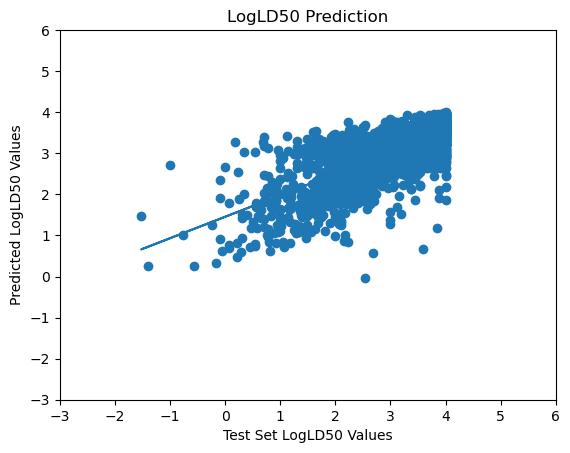

In [26]:
import numpy as np
import matplotlib.pyplot as plt
x = ytest
y = rfr.predict(xtest)
a, b = np.polyfit(x, y, 1)

#Find axis dimensions for scatter plot
import math
max_dim = math.ceil(max(x.max(),y.max())) +1
min_dim = math.floor(min(x.min(), y.min())) -1

plt.scatter(x, y)
plt.ylim([min_dim, max_dim])
plt.xlim([min_dim, max_dim])
plt.plot(x, a*x+b)
plt.title("LogLD50 Prediction")
plt.xlabel('Test Set LogLD50 Values')
plt.ylabel('Predicted LogLD50 Values')
# The optional line below saves the figure to file as an eps vector graphic as required in many journals.
# If you can't open in try using Acrobat, it will be able to read the postcript.
#plt.savefig('phenethylamine_predictions.eps', format='eps')

In [27]:
print("Testset Prediction Performance")
print("------------------------------")
correlation = np.corrcoef(x, y)[0,1]
print("Correlation:", correlation)
#R-square for Test Set results (above is R-square for training results)
rsquare = correlation**2
print("Testset Rsquare:", rsquare)

Testset Prediction Performance
------------------------------
Correlation: 0.7294014595144629
Testset Rsquare: 0.5320264891418286


In [ ]:
params={'n_estimators':[80,100,120],
        'criterion':['squared_error', 'absolute_error', 'friedman_mse'],
        'max_depth':[5,6,7],
        'min_samples_split':[2,4],
        'min_samples_leaf':[1,2],
        'max_features':['sqrt', 'log2', None],
        'oob_score':[True]}